In [33]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, confusion_matrix
# from matplotlib.colors import ListedColormap

# # Step 1: Prepare static sample data
# X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])
# y_train = np.array([0, 0, 1, 1, 0, 1])  # Sample labels for training data
# X_val = np.array([[2, 3], [3, 4], [6, 7], [7, 8]])
# y_val = np.array([0, 1, 1, 0])  # Sample labels for validation data
# X_test = np.array([[1, 3], [4, 6], [5, 8]])
# y_test = np.array([0, 1, 0])  # Sample labels for test data

# # Step 2: Define the Bayesian Classifier
# class BayesianClassifier:
#     def fit(self, X_train, y_train, reg=1):  # Add regularization parameter
#         self.classes = np.unique(y_train)
#         self.class_means = [np.mean(X_train[y_train == cls], axis=0) for cls in self.classes]
#         self.class_cov = np.cov(X_train.T) + reg * np.eye(X_train.shape[1])  # Regularization added
    
#     def predict(self, X):
#         scores = []
#         for mean in self.class_means:
#             mean_diff = X - mean
#             exponent = -0.5 * np.sum(mean_diff.dot(np.linalg.inv(self.class_cov)) * mean_diff, axis=1)
#             scores.append(exponent)
#         return np.argmax(scores, axis=0)


# # Step 3: Evaluate Performance
# classifier = BayesianClassifier()
# classifier.fit(X_train, y_train)

# # Accuracy on training data
# y_train_pred = classifier.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)

# # Accuracy on validation data
# y_val_pred = classifier.predict(X_val)
# val_accuracy = accuracy_score(y_val, y_val_pred)

# # Accuracy on test data
# y_test_pred = classifier.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# # Confusion matrix for test data
# conf_matrix = confusion_matrix(y_test, y_test_pred)

# print("Accuracy on training data:", train_accuracy)
# print("Accuracy on validation data:", val_accuracy)
# print("Accuracy on test data:", test_accuracy)
# print("Confusion Matrix:")
# print(conf_matrix)

# # Step 4: Plot Decision Regions
# def plot_decision_regions(X, y, classifier, title):
#     h = 0.02  # Step size in the mesh grid
#     x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#     y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
#     Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)
#     cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
#     plt.figure()
#     plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
#     plt.scatter(X[:, 0], X[:, 1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']), edgecolors='k', s=20)
#     plt.title(title)
#     plt.xlabel('Feature 1')
#     plt.ylabel('Feature 2')
#     plt.show()

# plot_decision_regions(X_train, y_train, classifier, title='Decision Regions (Training Data)')


Training Accuracy: 0.54
Validation Accuracy: 0.52
Test Accuracy: 0.41


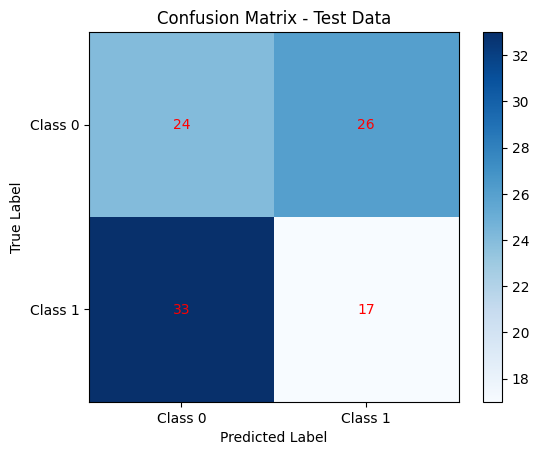

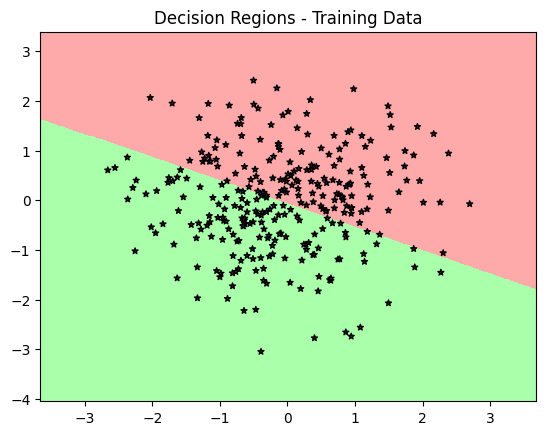

In [38]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
from scipy.stats import norm

class BayesianClassifier:
    def custom_unique(self, input_array):
        unique_list = []
        for item in input_array:
            if item not in unique_list:
                unique_list.append(item)
        return np.array(unique_list)

    def custom_mean(self, input_array):
        return sum(input_array) / len(input_array)

    def custom_covariance_matrix(self, X):
        mean_vector = self.custom_mean(X)
        centered_data = X - mean_vector
        covariance_matrix = np.dot(centered_data.T, centered_data) / (X.shape[0] - 1)
        return covariance_matrix

    def class_x_prior_probability(self, X):
        num_bins = np.max(X, axis=0)
        num_bins = int(np.max(num_bins))
        print("num_bins",num_bins)
        X_discretized = np.zeros_like(X, dtype=int)
        for i in range(X.shape[1]):
            bins = np.linspace(X[:, i].min(), X[:, i].max(), num_bins)
            X_discretized[:, i] = np.digitize(X[:, i], bins)
        num_samples, num_features = X_discretized.shape
        marginal_probs = []
        for i in range(num_features):
            feature_counts = np.bincount(X_discretized[:, i])
            marginal_prob = feature_counts / num_samples
            marginal_probs.append(marginal_prob)
        marginal_probs = np.array(marginal_probs)
        print("Marginal probabilities of each feature:")
        print(marginal_probs)
        return marginal_probs

    def class_y_prior_probability(self, y):
        y_int = y.astype(int)
        class_counts = np.bincount(y_int)
        total_samples = len(y)
        marginal_prob_y = class_counts / total_samples
        print("Marginal probability of y:", marginal_prob_y)
        return marginal_prob_y
     

    # def fit(self, X_train, y_train):
    #     # self.classes = np.unique(y_train)
    #     self.classes = self.custom_unique(y_train)
    #     self.class_means = []
    #     for cls in self.classes:
    #         # class_mean = np.mean(X_train[y_train == cls], axis=0)
    #         class_mean = self.custom_mean(X_train[y_train == cls])
    #         self.class_means.append(class_mean)
    #     # self.class_cov = np.cov(X_train.T)
    #     self.class_cov = self.custom_covariance_matrix(X_train)

    # def predict(self, X, y):
    #     self.class_x_prior_probability(X)
    #     self.class_y_prior_probability(y)
    #     scores = []
    #     d = X.shape[1]
    #     for mean in self.class_means:
    #         # print("pp",pp)
    #         mean_diff = X - mean
    #         md = -0.5 * np.sum(mean_diff.dot(np.linalg.inv(self.class_cov)) * mean_diff, axis=1)
    #         neumerator=np.exp(md)
    #         denominator=np.power((2*np.pi),d/2)*np.power(np.linalg.det(self.class_cov),1/2)
    #         ccpdf=neumerator/denominator
    #         # print("ccpdf",ccpdf)
    #         # pp=self.class_y_prior_probability(y)
    #         # e=self.class_x_prior_probability(X)
    #         # exponent=np.dot(np.dot(ccpdf,pp),np.dot(e,-1))
    #         exponent=ccpdf

    #         # print("exponent",exponent)
    #         scores.append(exponent)

    #     print("np.argmax(scores, axis=0)",np.argmax(scores, axis=0))
    #     return np.argmax(scores, axis=0)
    
    # def fit(self, X_train, y_train):
    #     self.classes = np.unique(y_train)
    #     self.class_priors = np.array([np.mean(y_train == cls) for cls in self.classes])
    #     self.class_conditional_pdf = []
    #     for cls in self.classes:
    #         class_data = X_train[y_train == cls]
    #         class_pdf = [norm(loc=np.mean(feature), scale=np.std(feature)) for feature in class_data.T]
    #         self.class_conditional_pdf.append(class_pdf)
            
    # def predict(self, X_test):
    #     posteriors = np.zeros((len(X_test), len(self.classes)))
    #     for i, cls in enumerate(self.classes):
    #         prior = self.class_priors[i]
    #         for j, x in enumerate(X_test):
    #             likelihood = 1
    #             for k, feature_pdf in enumerate(self.class_conditional_pdf[i]):
    #                 likelihood *= feature_pdf.pdf(x[k])
    #             posteriors[j, i] = likelihood * prior
    #     predicted_labels = np.argmax(posteriors, axis=1)
    #     return self.classes[predicted_labels]
    
    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        self.class_priors = np.array([np.mean(y_train == cls) for cls in self.classes])
        
        class_data = [X_train[y_train == cls] for cls in self.classes]
        self.class_means = [np.mean(class_, axis=0) for class_ in class_data]
        self.class_cov = np.cov(X_train.T)
        
    def predict(self, X_test):
        likelihoods = np.array([
            self.calculate_likelihood(X_test, class_mean, self.class_cov)
            for class_mean in self.class_means
        ])
        evidence = np.sum(likelihoods * self.class_priors[:, np.newaxis], axis=0)
        posteriors = likelihoods * self.class_priors[:, np.newaxis] / evidence
        return np.argmax(posteriors, axis=0)
    
    def calculate_likelihood(self, X, class_mean, class_cov):
        d = X.shape[1]
        constant = 1 / ((2 * np.pi) ** (d / 2) * np.sqrt(np.linalg.det(class_cov)))
        exponent = -0.5 * np.sum(np.dot(X - class_mean, np.linalg.inv(class_cov)) * (X - class_mean), axis=1)
        return constant * np.exp(exponent)

# Generate synthetic data
np.random.seed(0)
X_train = np.random.randn(300, 2)
y_train = np.concatenate([np.zeros(150), np.ones(150)])

X_val = np.random.randn(100, 2)
y_val = np.concatenate([np.zeros(50), np.ones(50)])

X_test = np.random.randn(100, 2)
y_test = np.concatenate([np.zeros(50), np.ones(50)])

# Train the classifier
classifier = BayesianClassifier()
classifier.fit(X_train, y_train)

# Predict labels
y_train_pred = classifier.predict(X_train)
y_val_pred = classifier.predict(X_val)
y_test_pred = classifier.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    plt.xticks([0, 1], labels=["Class 0", "Class 1"])
    plt.yticks([0, 1], labels=["Class 0", "Class 1"])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add numerical annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                    color="red")#"white" if cm[i, j] > thresh else "black")

    plt.show()


plot_confusion_matrix(y_test, y_test_pred, title="Confusion Matrix - Test Data")

# Plot decision regions
def plot_decision_regions(X, y, classifier, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, marker= '*', edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

plot_decision_regions(X_train, y_train, classifier, title="Decision Regions - Training Data")
